In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [4]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

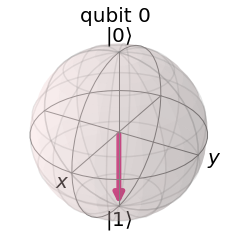

In [5]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [6]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [7]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐ ░ ┌───┐┌───┐
q: ┤ X ├─░─┤ Y ├┤ Z ├
   └───┘ ░ └───┘└───┘

In [8]:
# Hadamard gate
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [16]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# initial_state = [1,0]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc,0,0) # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

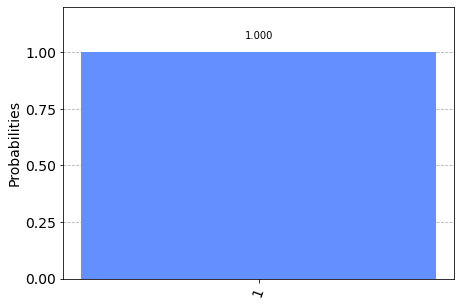

In [18]:
qobj = assemble(qc) # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts() # Do the simulation, returning the state vector
plot_histogram(counts) # Display the output on measurement of state vector

In [19]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [20]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()
#Z-gate is a special case of P-gate with phi = pi

┌────────┐
q: ┤ P(π/4) ├
   └────────┘

In [24]:
qc = QuantumCircuit(1)
qc.s(0) # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ S ├┤ Sdg ├
   └───┘└─────┘

In [25]:
qc = QuantumCircuit(1)
qc.t(0) # Apply T-gate to qubit 0 
qc.tdg(0) # Apply Tdg-gate to qubit 0 
qc.draw()

┌───┐┌─────┐
q: ┤ T ├┤ Tdg ├
   └───┘└─────┘

In [26]:
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [27]:
# Demonstration of U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw()

┌────────────┐
q: ┤ U(π/2,0,π) ├
   └────────────┘

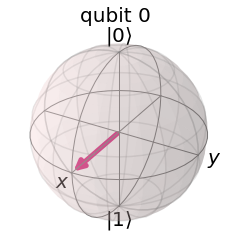

In [28]:
# Demonstration of the above result as a plot
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)